In [251]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ssharma2323/Swati_Assignment/main/FinalTrain.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [253]:
unique_ages = df.groupby('Delivery_person_ID')['Delivery_person_Age'].unique()
unique_ages

Delivery_person_ID
AGRRES010DEL01      [34.0, 38.0, 21.0, 39.0, 25.0, nan, 20.0, 36.0]
AGRRES010DEL02    [37.0, 30.0, 35.0, 21.0, 38.0, 25.0, 34.0, 33....
AGRRES010DEL03    [33.0, 38.0, 22.0, 31.0, 20.0, 29.0, 32.0, 25....
AGRRES01DEL01             [nan, 34.0, 37.0, 22.0, 38.0, 23.0, 32.0]
AGRRES01DEL02     [24.0, 39.0, 33.0, 25.0, 37.0, 36.0, 29.0, 23....
                                        ...                        
VADRES19DEL02     [38.0, 33.0, 34.0, 28.0, 36.0, 24.0, 26.0, 22....
VADRES19DEL03     [29.0, 30.0, 28.0, 25.0, 24.0, 38.0, 37.0, 33....
VADRES20DEL01     [34.0, 36.0, 20.0, 33.0, 30.0, 38.0, 21.0, 28....
VADRES20DEL02     [36.0, 31.0, 20.0, 34.0, 21.0, 24.0, nan, 32.0...
VADRES20DEL03     [35.0, 37.0, 38.0, 30.0, 32.0, 22.0, 24.0, nan...
Name: Delivery_person_Age, Length: 1320, dtype: object

In [254]:
df[['Delivery_person_Age','Order_Date']][df['Delivery_person_ID']=='AGRRES010DEL01']

,Delivery_person_Age,Order_Date
83,34.0,16-02-2022
4549,38.0,18-02-2022
7741,21.0,16-02-2022
12428,34.0,11-02-2022
13235,39.0,15-02-2022
15362,25.0,15-02-2022
16547,NaN,13-02-2022
18231,38.0,17-02-2022
20227,34.0,14-02-2022
24586,20.0,12-02-2022


Seems like there is some issue with Delivery_person_ID, since delivery person age is different in same year. It might be the case that multiple individuals sharing the same ID. Hence we can just drop Delivery_person_ID column.

In [255]:
import warnings
warnings.filterwarnings('ignore')

In [256]:
print(df.shape)

(45584, 20)


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [258]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [259]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [260]:
df[df.duplicated()]

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)


In [261]:
df=df.drop('ID',axis=1)

Missing Values

In [262]:
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [263]:
features_with_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]
features_with_na

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Time_Orderd',
 'Weather_conditions',
 'Road_traffic_density',
 'multiple_deliveries',
 'Festival',
 'City']

In [264]:
for feature in features_with_na:
    df=df.copy()
    
    print(feature,np.round(df[feature].isnull().mean()*100,2),'% missing values')

Delivery_person_Age 4.07 % missing values
Delivery_person_Ratings 4.19 % missing values
Time_Orderd 3.8 % missing values
Weather_conditions 1.35 % missing values
Road_traffic_density 1.32 % missing values
multiple_deliveries 2.18 % missing values
Festival 0.5 % missing values
City 2.63 % missing values


Delivery_person_Age has heighest number of missing values

<Axes: >

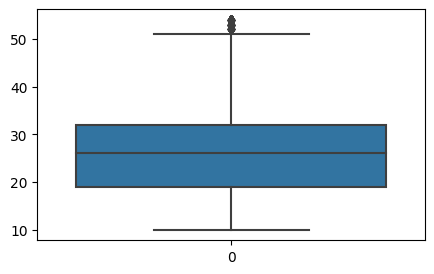

In [265]:
sns.boxplot(df['Time_taken (min)'])

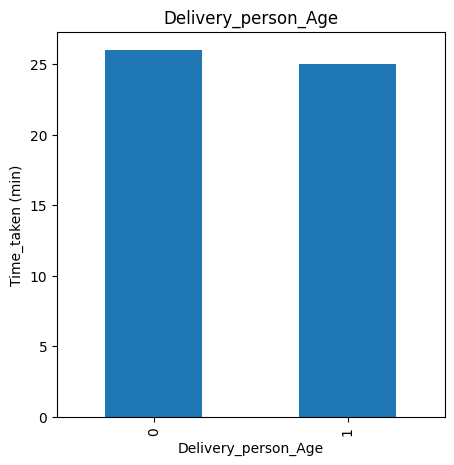

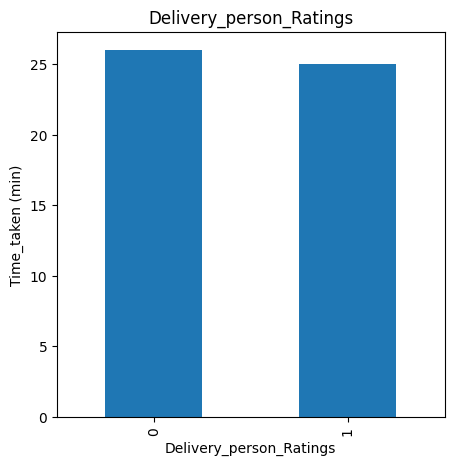

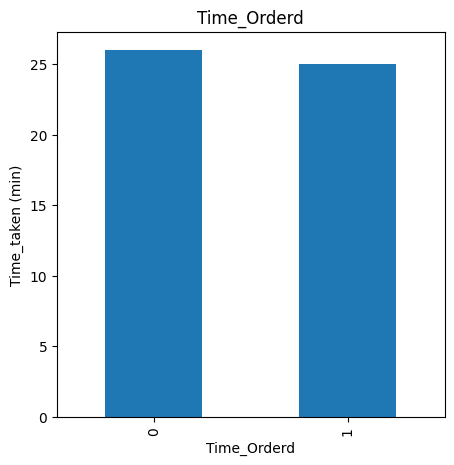

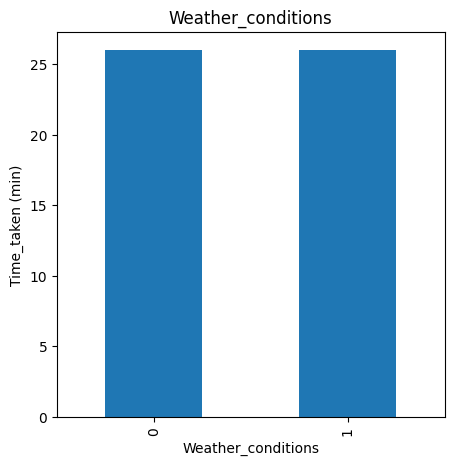

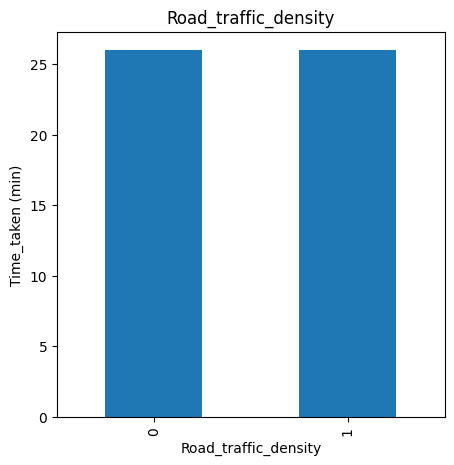

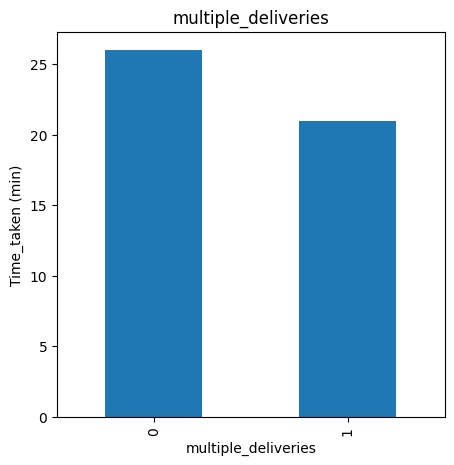

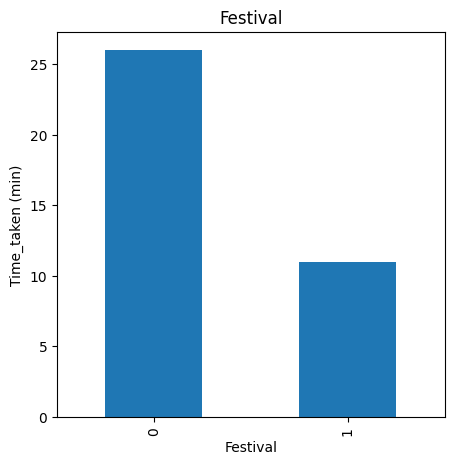

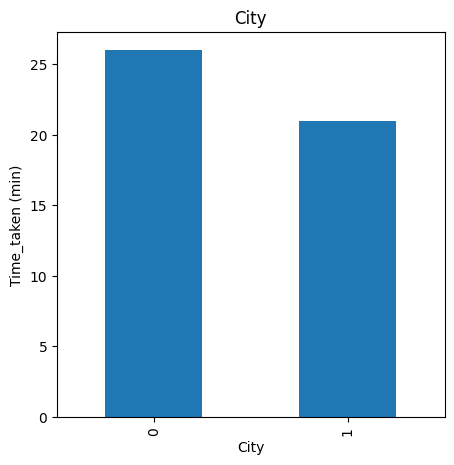

In [266]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 5)
df1=df.copy()
for feature in features_with_na:
    df1[feature]=np.where(df1[feature].isnull(),1,0)
    df1.groupby(feature)['Time_taken (min)'].median().plot.bar()
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Time_taken (min)')
    plt.show()

Age, City, Festival and mutiple delivery columns shows significant impact of null values on delivery time. So we have to carefully replace null values with something meaningful

Numerical Variables

In [267]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='O' and 'latitude' not in feature and 'longitude' not in feature]

In [268]:
numerical_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)']

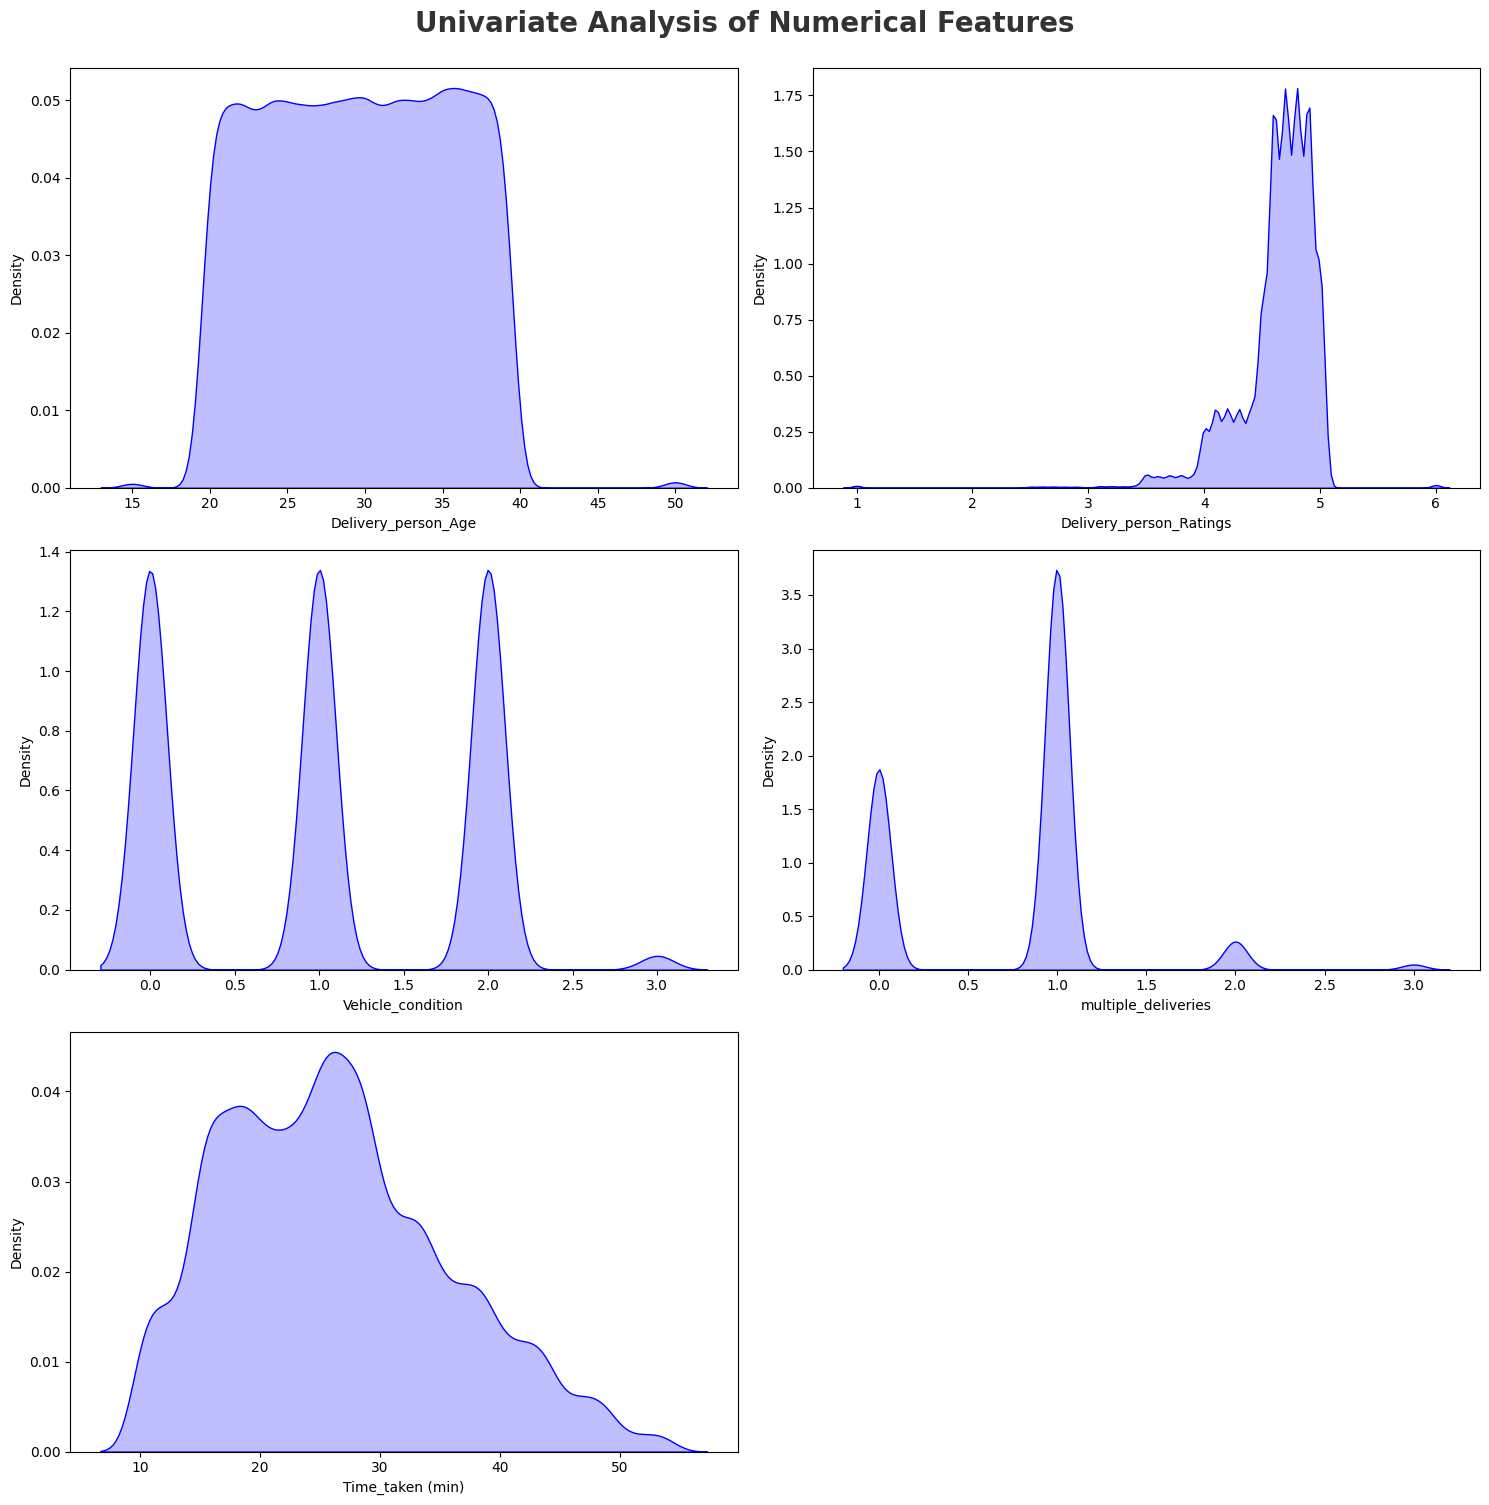

In [269]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_feature)):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(x=df[numerical_feature[i]],fill=True, color='b')
    plt.xlabel(numerical_feature[i])
    plt.tight_layout()

Delivery person ratings seems to be left skewed and Time_taken to be right skewed

Discrete feature

In [270]:
for feature in numerical_feature:
    print(feature,'has',len(df[feature].unique()),'unique values')

Delivery_person_Age has 23 unique values
Delivery_person_Ratings has 29 unique values
Vehicle_condition has 4 unique values
multiple_deliveries has 5 unique values
Time_taken (min) has 45 unique values


In [271]:
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<23]
discrete_feature

['Vehicle_condition', 'multiple_deliveries']

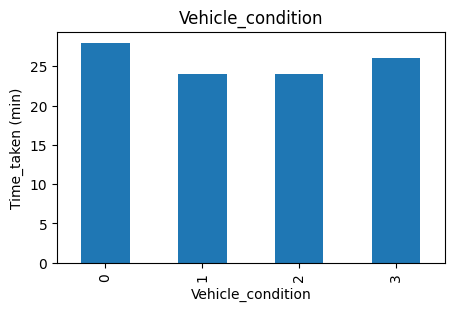

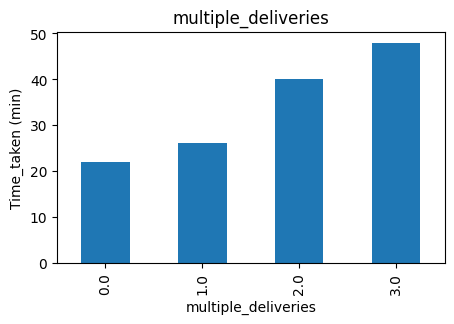

In [272]:
## Lets find the relationship between Discrete features and Delivery time
import matplotlib
matplotlib.rcParams['figure.figsize'] = (5, 3)

df1=df.copy()
for feature in discrete_feature:
    df1.groupby(feature)['Time_taken (min)'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Time_taken (min)')
    plt.title(feature)
    plt.show()

Continuous Variable

In [273]:
continuous_feature=[feature for feature in numerical_feature if len(df[feature].unique())>=23]
continuous_feature

['Delivery_person_Age', 'Delivery_person_Ratings', 'Time_taken (min)']

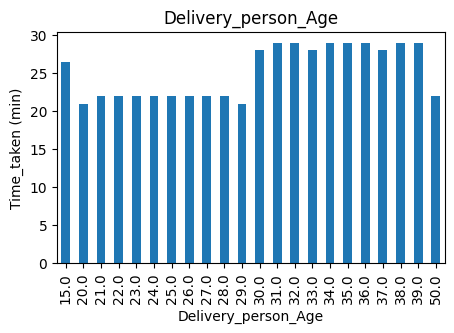

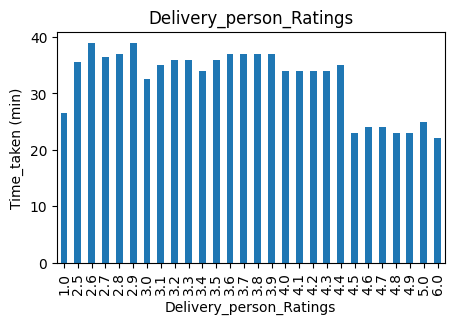

In [274]:
## Lets find the relationship between continuous_feature and Delivery time
# 
df1 = df1.copy()
for feature in continuous_feature:
    if feature =='Time_taken (min)':
        pass
    else:
        df1.groupby(feature)['Time_taken (min)'].median().plot.bar()
        plt.xlabel(feature)
        plt.ylabel('Time_taken (min)')
        plt.title(feature)
        plt.show()

Check for Outliers

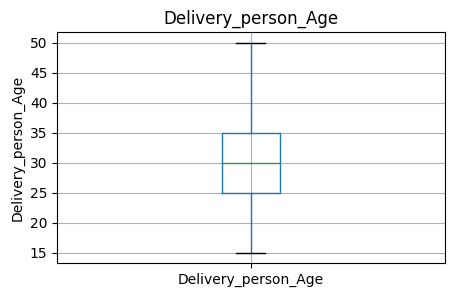

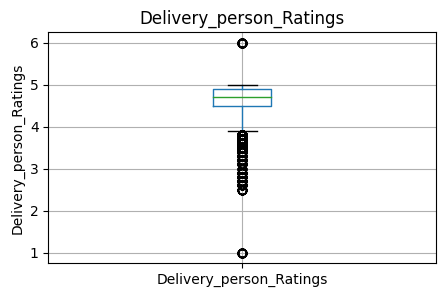

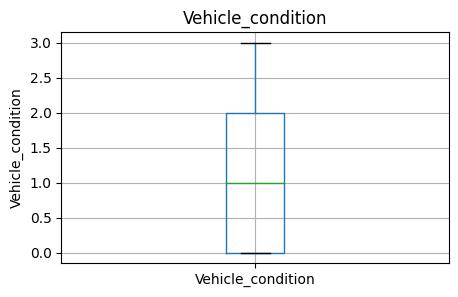

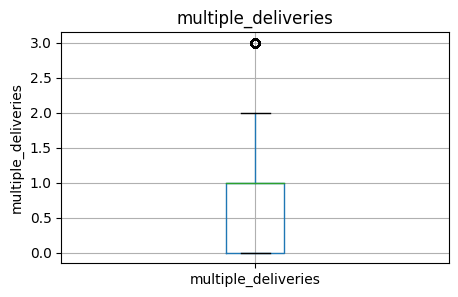

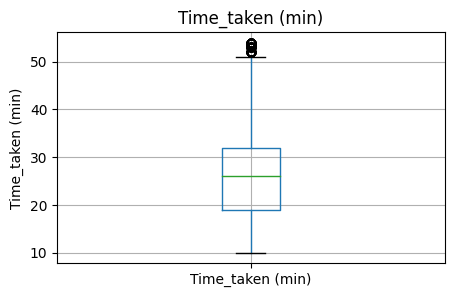

In [275]:
for feature in numerical_feature:
    df1.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

Time taken and delivery person ratings has outliers

Categorical Variables

In [276]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' and 'Order' not in feature and 'time' not in feature and 'Delivery_person_ID' not in feature]
categorical_features

['Weather_conditions',
 'Road_traffic_density',
 'Type_of_order',
 'Type_of_vehicle',
 'Festival',
 'City']

In [277]:
for feature in categorical_features:
    print(feature,'has',len(df[feature].unique()),'unique values')

Weather_conditions has 7 unique values
Road_traffic_density has 5 unique values
Type_of_order has 4 unique values
Type_of_vehicle has 4 unique values
Festival has 3 unique values
City has 4 unique values


In [278]:
for feature in categorical_features:
    print(feature,'has',len(df[feature].unique()),'unique values : ',list(df[feature].unique()))

Weather_conditions has 7 unique values :  ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan]
Road_traffic_density has 5 unique values :  ['Jam', 'High', 'Medium', 'Low', nan]
Type_of_order has 4 unique values :  ['Snack', 'Meal', 'Drinks', 'Buffet']
Type_of_vehicle has 4 unique values :  ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Festival has 3 unique values :  ['No', 'Yes', nan]
City has 4 unique values :  ['Metropolitian', 'Urban', 'Semi-Urban', nan]


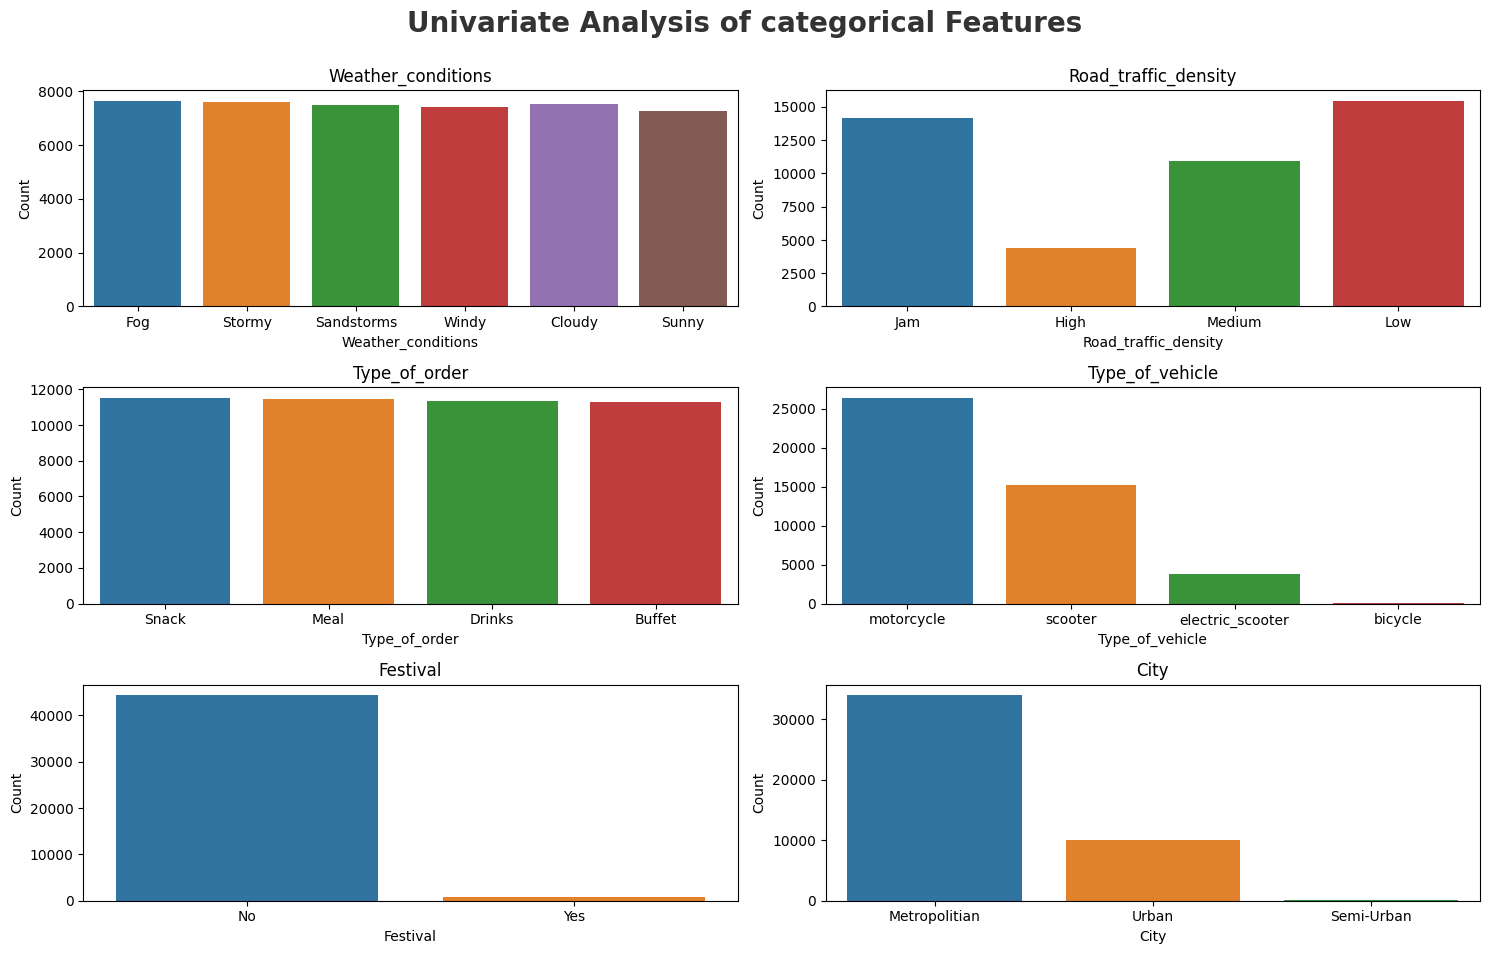

In [279]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)


    
    
for i in range(0, len(categorical_features)):
    plt.subplot(5, 2, i+1)
    sns.countplot(x=df[categorical_features[i]], data=df[categorical_features])
    plt.title(categorical_features[i])
    plt.xlabel(categorical_features[i])
    plt.ylabel("Count")
    plt.tight_layout()

find the relationship between categorical feature and Delivery time

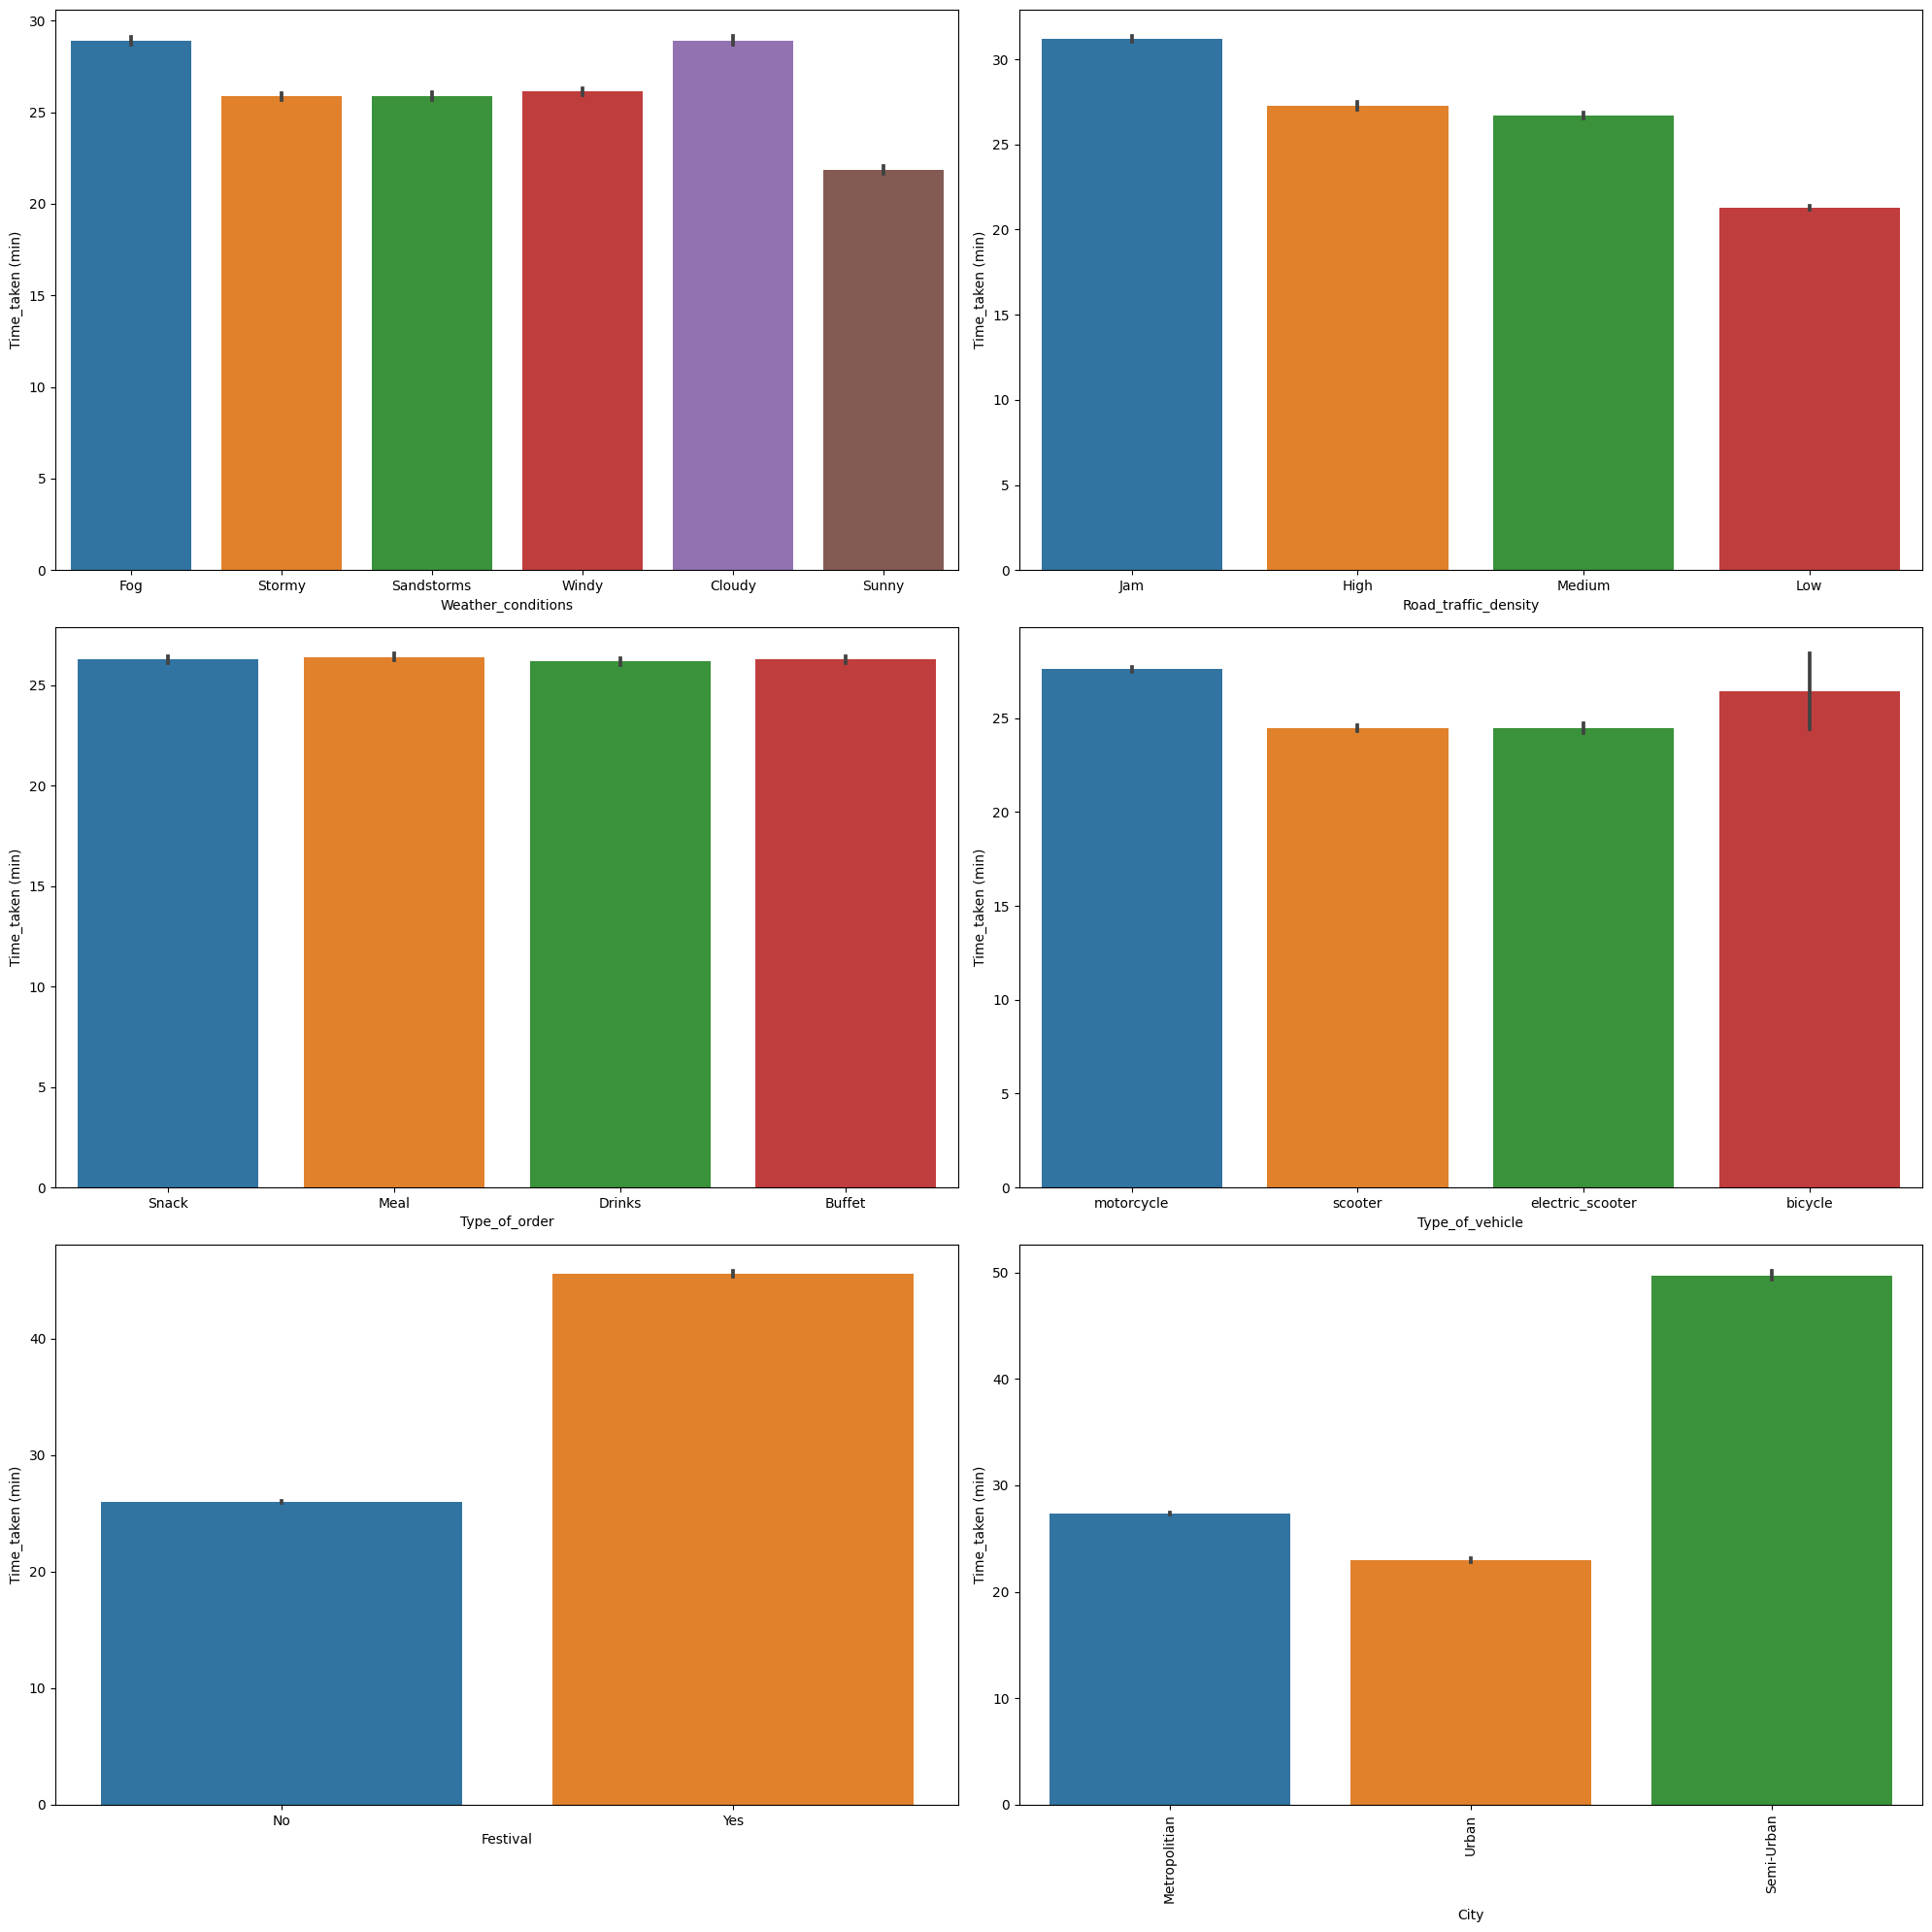

In [280]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
axs=axs.flatten()


for i, var in enumerate(categorical_features):
    sns.barplot(x=var,y='Time_taken (min)',data=df,ax=axs[i],estimator=np.mean)
axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
 
fig.tight_layout()
plt.show()

Since Type of order doesn't seems to be having any impact on DElivery time, so we can drop it

Ordinal Feature

In [281]:
ordinal_feature=['Weather_conditions','City']
ordinal_feature

['Weather_conditions', 'City']

Nominal Feature

In [282]:
nominal_feature=[feature for feature in categorical_features if feature not in ordinal_feature ]
nominal_feature

['Road_traffic_density', 'Type_of_order', 'Type_of_vehicle', 'Festival']

In [283]:
location_time_feature=[feature for feature in df.columns if feature not in categorical_features and feature not in numerical_feature and 'Delivery_person_ID' not in feature]
location_time_feature

['Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Order_Date',
 'Time_Orderd',
 'Time_Order_picked']

Feature Engineering

In [284]:
X = df.drop(['Time_Orderd','Time_Order_picked'], axis=1)
y = df["Time_taken (min)"]

In [285]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)'],
      dtype='object')

In [286]:
X.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [287]:
from sklearn.model_selection import train_test_split

In [288]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [289]:
X_train

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
14388,KOCRES12DEL01,28.0,4.7,9.988483,76.295211,9.998483,76.305211,11-02-2022,Windy,Low,1,Buffet,scooter,0.0,No,Metropolitian,17
439,PUNERES13DEL03,21.0,4.7,18.562450,73.916619,18.652450,74.006619,10-03-2022,Fog,Low,2,Drinks,scooter,0.0,No,Metropolitian,28
4784,MUMRES03DEL03,35.0,4.7,19.223840,72.841347,19.253840,72.871347,03-03-2022,Sunny,Jam,2,Snack,electric_scooter,1.0,No,Metropolitian,16
17391,VADRES17DEL01,39.0,4.8,0.000000,0.000000,0.010000,0.010000,15-03-2022,Sunny,High,0,Buffet,motorcycle,0.0,No,Metropolitian,26
23760,PUNERES12DEL03,29.0,4.7,18.520016,73.830547,18.610016,73.920547,06-04-2022,Sandstorms,Low,0,Snack,motorcycle,1.0,No,Metropolitian,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32194,COIMBRES03DEL03,27.0,4.7,11.025083,77.015393,11.085083,77.075393,03-04-2022,Fog,Jam,1,Snack,motorcycle,1.0,No,Metropolitian,23
31071,COIMBRES04DEL02,36.0,4.9,11.024839,77.007003,11.154839,77.137003,06-03-2022,Stormy,Jam,2,Meal,scooter,0.0,No,Metropolitian,30
38567,PUNERES02DEL03,23.0,5.0,18.551440,73.804855,18.581440,73.834855,05-04-2022,Sunny,Medium,0,Buffet,motorcycle,0.0,No,Metropolitian,15
2878,MYSRES04DEL02,30.0,5.0,12.308500,76.665808,12.328500,76.685808,07-03-2022,Stormy,High,2,Drinks,scooter,1.0,No,Metropolitian,32


In [290]:
X_test

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
11445,VADRES01DEL03,34.0,4.6,22.307898,73.167788,22.397898,73.257788,02-04-2022,Windy,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,43
42924,JAPRES16DEL02,20.0,4.6,26.849596,75.800512,26.869596,75.820512,28-03-2022,Sunny,Low,0,Meal,motorcycle,1.0,NaN,Metropolitian,12
1945,VADRES13DEL02,31.0,4.9,22.310237,73.158921,22.440237,73.288921,25-03-2022,Stormy,Low,2,Buffet,electric_scooter,1.0,No,Metropolitian,20
22469,VADRES19DEL01,25.0,4.3,22.311844,73.165081,22.421844,73.275081,08-03-2022,Sandstorms,Medium,0,Meal,motorcycle,1.0,No,Metropolitian,32
7639,SURRES010DEL01,27.0,4.8,21.171060,72.789292,21.241060,72.859292,06-03-2022,Stormy,Medium,0,Drinks,motorcycle,2.0,No,Metropolitian,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33766,PUNERES14DEL01,30.0,4.9,18.516216,73.842527,18.586216,73.912527,14-03-2022,Fog,Low,2,Buffet,scooter,1.0,No,Metropolitian,27
2925,SURRES13DEL01,25.0,4.9,21.170096,72.789122,21.180096,72.799122,19-03-2022,Cloudy,Low,1,Meal,scooter,1.0,No,Urban,12
40617,AGRRES09DEL03,33.0,4.8,0.000000,0.000000,0.090000,0.090000,14-02-2022,Cloudy,Jam,0,Meal,motorcycle,1.0,No,Metropolitian,52
38104,VADRES08DEL01,33.0,4.9,0.000000,0.000000,0.010000,0.010000,19-03-2022,Fog,High,2,Drinks,scooter,1.0,No,Metropolitian,26


In [291]:
y_train

14388    17
439      28
4784     16
17391    26
23760    22
         ..
32194    23
31071    30
38567    15
2878     32
4366     28
Name: Time_taken (min), Length: 41025, dtype: int64

In [292]:
y_test

11445    43
42924    12
1945     20
22469    32
7639     38
         ..
33766    27
2925     12
40617    52
38104    26
17116    30
Name: Time_taken (min), Length: 4559, dtype: int64

1) treating null values

In [293]:
df1['Delivery_person_Ratings'] = df1['Delivery_person_Ratings'].fillna(df1['Delivery_person_Ratings'].median())
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].fillna(df1['Delivery_person_Age'].mean())
df1['multiple_deliveries'] = df1['multiple_deliveries'].fillna(df1['multiple_deliveries'].mode()[0])
df1['Weather_conditions'] = df1['Weather_conditions'].fillna(df1['Weather_conditions'].mode()[0])
df1['Road_traffic_density'] = df1['Road_traffic_density'].fillna(df1['Road_traffic_density'].mode()[0])
df1['Festival'] = df1['Festival'].fillna(df1['Festival'].mode()[0])
df1['City'] = df1['City'].fillna(df1['City'].mode()[0])


In [294]:
df1.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
dtype: int64

2) Creating new features from existing features

1) Cooking time

In [295]:
df2=df1.copy()

In [296]:
for feature in ['Time_Orderd','Time_Order_picked']:
    print(feature,df2[feature].unique())

Time_Orderd ['21:55' '14:55' '17:30' '09:20' '19:50' '20:25' '20:30' '20:40' '21:15'
 '20:20' '22:30' '08:15' '19:30' '12:25' '18:35' '20:35' '23:20' '21:20'
 '23:35' '22:35' '23:25' '13:35' '21:35' '18:55' '14:15' '0.458333333'
 '09:45' '08:40' '0.958333333' '17:25' nan '19:45' '19:10' '10:55' '21:40'
 '0.791666667' '16:45' '11:30' '15:10' '22:45' '22:10' '20:45' '22:50'
 '17:55' '09:25' '20:15' '22:25' '22:40' '23:50' '15:25' '10:20' '20:55'
 '10:40' '15:55' '20:10' '12:10' '15:30' '10:35' '21:10' '20:50' '12:35'
 '0.875' '23:40' '18:15' '18:20' '11:45' '12:45' '23:30' '10:50' '21:25'
 '10:10' '17:50' '22:20' '12:40' '23:55' '10:25' '08:45' '23:45' '19:55'
 '22:15' '23:10' '09:15' '18:25' '18:45' '16:50' '1' '14:20' '10:15'
 '08:50' '0.375' '17:45' '16:35' '08:30' '21:45' '19:40' '14:50' '18:10'
 '12:20' '12:50' '09:10' '12:30' '17:10' '19:15' '17:20' '18:30' '13:10'
 '19:35' '09:50' '0.625' '0.833333333' '10:30' '09:40' '15:35' '16:55'
 '22:55' '0.666666667' '0.75' '17:15' '21:30' '

In [297]:
df2['Time_Orderd']=df2['Time_Orderd'].fillna('00:00')

In [298]:
class TimeDataCleaning:
    def __init__(self, time_value):
        self.time_value = time_value
        
    def clean_time(self, time_value):
        
        if time_value.startswith('24'):
            if time_value.endswith('00'):
                return '23:59'
            else:
                return '00' + time_value[2:]
        return time_value
    
    def convert_time(self):
        if ":" in self.time_value:
            if len(self.time_value) > 5:
                self.time_value = self.time_value[:5]

            return self.clean_time(self.time_value)


        else:
            time_float = float(self.time_value)
            hours_in_decimal = time_float * 24
            hrs = int(hours_in_decimal)
            minutes = int((hours_in_decimal - hrs) * 60)
            if hrs == 24 and minutes > 0:
                hrs = 0
            time_value = "{:02d}:{:02d}".format(hrs, minutes)

            return self.clean_time(time_value)

        

In [299]:
df2['Time_Orderd'] = df2['Time_Orderd'].apply(lambda x: TimeDataCleaning(x).convert_time())
df2['Time_Order_picked'] = df2['Time_Order_picked'].apply(lambda x: TimeDataCleaning(x).convert_time())

In [300]:
for feature in ['Time_Orderd','Time_Order_picked']:
    print(feature,df2[feature].unique())

Time_Orderd ['21:55' '14:55' '17:30' '09:20' '19:50' '20:25' '20:30' '20:40' '21:15'
 '20:20' '22:30' '08:15' '19:30' '12:25' '18:35' '20:35' '23:20' '21:20'
 '23:35' '22:35' '23:25' '13:35' '21:35' '18:55' '14:15' '10:59' '09:45'
 '08:40' '22:59' '17:25' '00:00' '19:45' '19:10' '10:55' '21:40' '19:00'
 '16:45' '11:30' '15:10' '22:45' '22:10' '20:45' '22:50' '17:55' '09:25'
 '20:15' '22:25' '22:40' '23:50' '15:25' '10:20' '20:55' '10:40' '15:55'
 '20:10' '12:10' '15:30' '10:35' '21:10' '20:50' '12:35' '21:00' '23:40'
 '18:15' '18:20' '11:45' '12:45' '23:30' '10:50' '21:25' '10:10' '17:50'
 '22:20' '12:40' '23:55' '10:25' '08:45' '23:45' '19:55' '22:15' '23:10'
 '09:15' '18:25' '18:45' '16:50' '23:59' '14:20' '10:15' '08:50' '09:00'
 '17:45' '16:35' '08:30' '21:45' '19:40' '14:50' '18:10' '12:20' '12:50'
 '09:10' '12:30' '17:10' '19:15' '17:20' '18:30' '13:10' '19:35' '09:50'
 '15:00' '19:59' '10:30' '09:40' '15:35' '16:55' '22:55' '16:00' '18:00'
 '17:15' '21:30' '18:40' '11:10' '13:50

In [301]:
df2[['Time_Orderd','Time_Order_picked','Order_Date']].head()

,Time_Orderd,Time_Order_picked,Order_Date
0,21:55,22:10,12-02-2022
1,14:55,15:05,13-02-2022
2,17:30,17:40,04-03-2022
3,09:20,09:30,13-02-2022
4,19:50,20:05,14-02-2022


In [302]:
df2['Order_Date'] = pd.to_datetime(df2['Order_Date'], format='%d-%m-%Y')

df2['Orderd_datetime'] = df2['Order_Date'].dt.strftime('%Y-%m-%d') + ' ' + df2['Time_Orderd']

df2['Orderd_datetime'] = pd.to_datetime(df2['Orderd_datetime'], format='%Y-%m-%d %H:%M')


In [303]:
import pandas as pd
from datetime import timedelta


df2['Time_Orderd_1'] = pd.to_datetime(df2['Time_Orderd'], format='%H:%M')
df2['picked_datetime'] = pd.to_datetime(df2['Time_Order_picked'], format='%H:%M')
df2['Order_picked_date'] = pd.to_datetime(df2['Order_Date'])

df2['Time_Difference'] = df2['picked_datetime'] - df2['Time_Orderd_1']

more_than_6_hours = abs(df2['Time_Difference']) > pd.Timedelta(hours=6)

df2.loc[more_than_6_hours, 'Order_picked_date'] += timedelta(days=1)

df2['picked_datetime'] = df2['picked_datetime'].dt.strftime('%H:%M:%S')

df2['picked_datetime'] = df2['Order_picked_date'].dt.strftime('%Y-%m-%d') + ' ' + df2['picked_datetime']

df2['picked_datetime'] = pd.to_datetime(df2['picked_datetime'], format='%Y-%m-%d %H:%M:%S')


In [304]:
df2 = df2.drop(['Time_Difference','Time_Orderd_1'], axis=1)
df2['cooking_time'] = (df2['picked_datetime'] - df2['Orderd_datetime']).dt.total_seconds() / 60
df2['cooking_time'] = df2['cooking_time'].astype(int)

In [305]:
df2[['Time_Orderd','Orderd_datetime','picked_datetime','cooking_time']][df2['cooking_time']==max(df2['cooking_time']) ]

,Time_Orderd,Orderd_datetime,picked_datetime,cooking_time
2523,00:00,2022-03-06,2022-03-07 23:59:00,2879
4459,00:00,2022-03-10,2022-03-11 23:59:00,2879
8351,00:00,2022-02-15,2022-02-16 23:59:00,2879
11259,00:00,2022-04-04,2022-04-05 23:59:00,2879
11448,00:00,2022-03-27,2022-03-28 23:59:00,2879
15334,00:00,2022-03-05,2022-03-06 23:59:00,2879
15363,00:00,2022-04-05,2022-04-06 23:59:00,2879
16831,00:00,2022-03-25,2022-03-26 23:59:00,2879
19547,00:00,2022-02-11,2022-02-12 23:59:00,2879
21210,00:00,2022-03-30,2022-03-31 23:59:00,2879


In [306]:
df2['cooking_time'].unique()

array([  15,   10,    5,   11, 2555,    4,   14, 2370,    6,    9, 2545,
         16, 2860, 2510, 2690, 2725, 2765, 2625, 2800, 2825, 2515, 2795,
       2790, 2530, 2220, 2805, 2170, 2160, 2665, 2105, 2085, 2550, 2090,
       2870, 2705, 2660, 2745, 2675, 2535, 2050, 2605, 2635, 2285, 2580,
       2490, 2010, 1960, 2630, 2845, 2520, 2730, 2670, 2025, 2365, 2480,
       2475, 2650, 2600, 1955, 2210, 2185, 2275, 2840, 2355, 1990, 2525,
       2850, 2680, 2585, 2575, 2610, 2815, 2879, 2340, 2685, 2015, 2540,
       2780, 2000, 2565, 1945, 2395, 2855, 2700, 2770, 2735, 2155, 2710,
       2785, 1980, 2045, 2810, 2455, 2320, 2125, 2835, 2190, 2345, 2715,
       2485, 2865, 2750, 2645, 2620, 2450, 2570, 2165, 2195, 2099, 2505,
       2830, 2639, 2040, 2775, 2655, 2695, 1985, 2310, 2405, 2740, 2020,
       2390, 1975, 2615, 2595, 2760, 2590, 2500, 2055, 2755, 2875, 2260,
       2250, 2385, 2035, 2225, 2560, 1995, 1950, 2030, 1970, 2230, 2720,
       2005, 2095, 2495, 2240, 1965, 2335, 2400, 21

In [307]:
df2['Time_taken (min)'].corr(df2['cooking_time'])

0.005280720337964771

Since correlation of 'Cooking time' with 'Delivery time' is very less, we should not take it for prediction 'Delivery time'

2) calculating distance between resturant and delivery address

In [308]:
import pandas as pd
import math

def calculate_distance(row):
    try: 
        lat1 = row['Restaurant_latitude']
        lon1 = row['Restaurant_longitude']
        lat2 = row['Delivery_location_latitude']
        lon2 = row['Delivery_location_longitude']
        
        '''
        Since for few locations where lat long is negative, Restaurant location was of sea which is not possible and if we make it 
        positive then it is at feasible distance to delivery location, hence making the adjustment accordingly
        '''
        if lat1<0:
            lat1=lat1*(-1)
        if lon1<0:
            lon1=lon1*(-1)
        # Convert degrees to radians
        lat1_rad = math.radians(lat1)
        lon1_rad = math.radians(lon1)
        lat2_rad = math.radians(lat2)
        lon2_rad = math.radians(lon2)

        # Radius of the Earth in kilometers
        radius = 6371

        # Calculate the differences between the coordinates
        dlat = lat2_rad - lat1_rad
        dlon = lon2_rad - lon1_rad

        # Haversine formula
        a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon/2) * math.sin(dlon/2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
        distance = radius * c

        return distance
    except (TypeError, ValueError):
        return None

# Calculate distances and assign them to a new column
df1['distance'] = df1.apply(calculate_distance, axis=1)


In [309]:
print(min(df1['distance']))
print(max(df1['distance']))

1.4650674052309467
20.969489380087342


<Axes: >

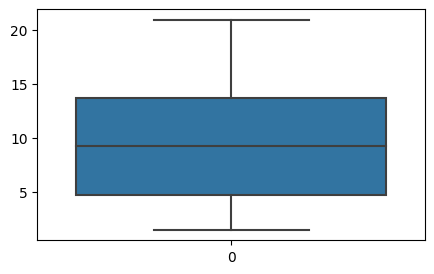

In [310]:
sns.boxplot(df1['distance'])

In [311]:
correlation = df1['distance'].corr(df1['Time_taken (min)'])

print(correlation)

0.32109853050806814


In [312]:
df1[df1['distance'].isin([min(df1['distance']), max(df1['distance'])])]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
903,ALHRES12DEL03,22.0,4.7,25.443994,81.860187,25.583994,82.000187,16-02-2022,22:55,23:10,Cloudy,Low,2,Drinks,electric_scooter,0.0,No,Metropolitian,26,20.969489
7401,LUDHRES04DEL01,28.0,4.8,30.914057,75.839820,30.924057,75.849820,17-02-2022,11:15,11:20,Stormy,High,2,Snack,scooter,1.0,No,Metropolitian,16,1.465067
15701,ALHRES12DEL03,22.0,5.0,25.443994,81.860187,25.583994,82.000187,12-02-2022,22:10,22:15,Sandstorms,Low,1,Meal,motorcycle,0.0,No,Urban,12,20.969489
25917,ALHRES12DEL03,32.0,3.8,25.443994,81.860187,25.583994,82.000187,14-02-2022,20:25,20:30,Sandstorms,Jam,2,Snack,motorcycle,1.0,No,Urban,33,20.969489
26576,LUDHRES04DEL01,21.0,4.5,30.914057,75.839820,30.924057,75.849820,13-02-2022,09:10,09:20,Windy,Low,2,Drinks,electric_scooter,1.0,No,Metropolitian,13,1.465067
33057,LUDHRES04DEL01,21.0,4.9,30.914057,75.839820,30.924057,75.849820,11-02-2022,10:50,11:05,Cloudy,Low,0,Buffet,motorcycle,1.0,No,Metropolitian,16,1.465067


3) Treating Categorical Features

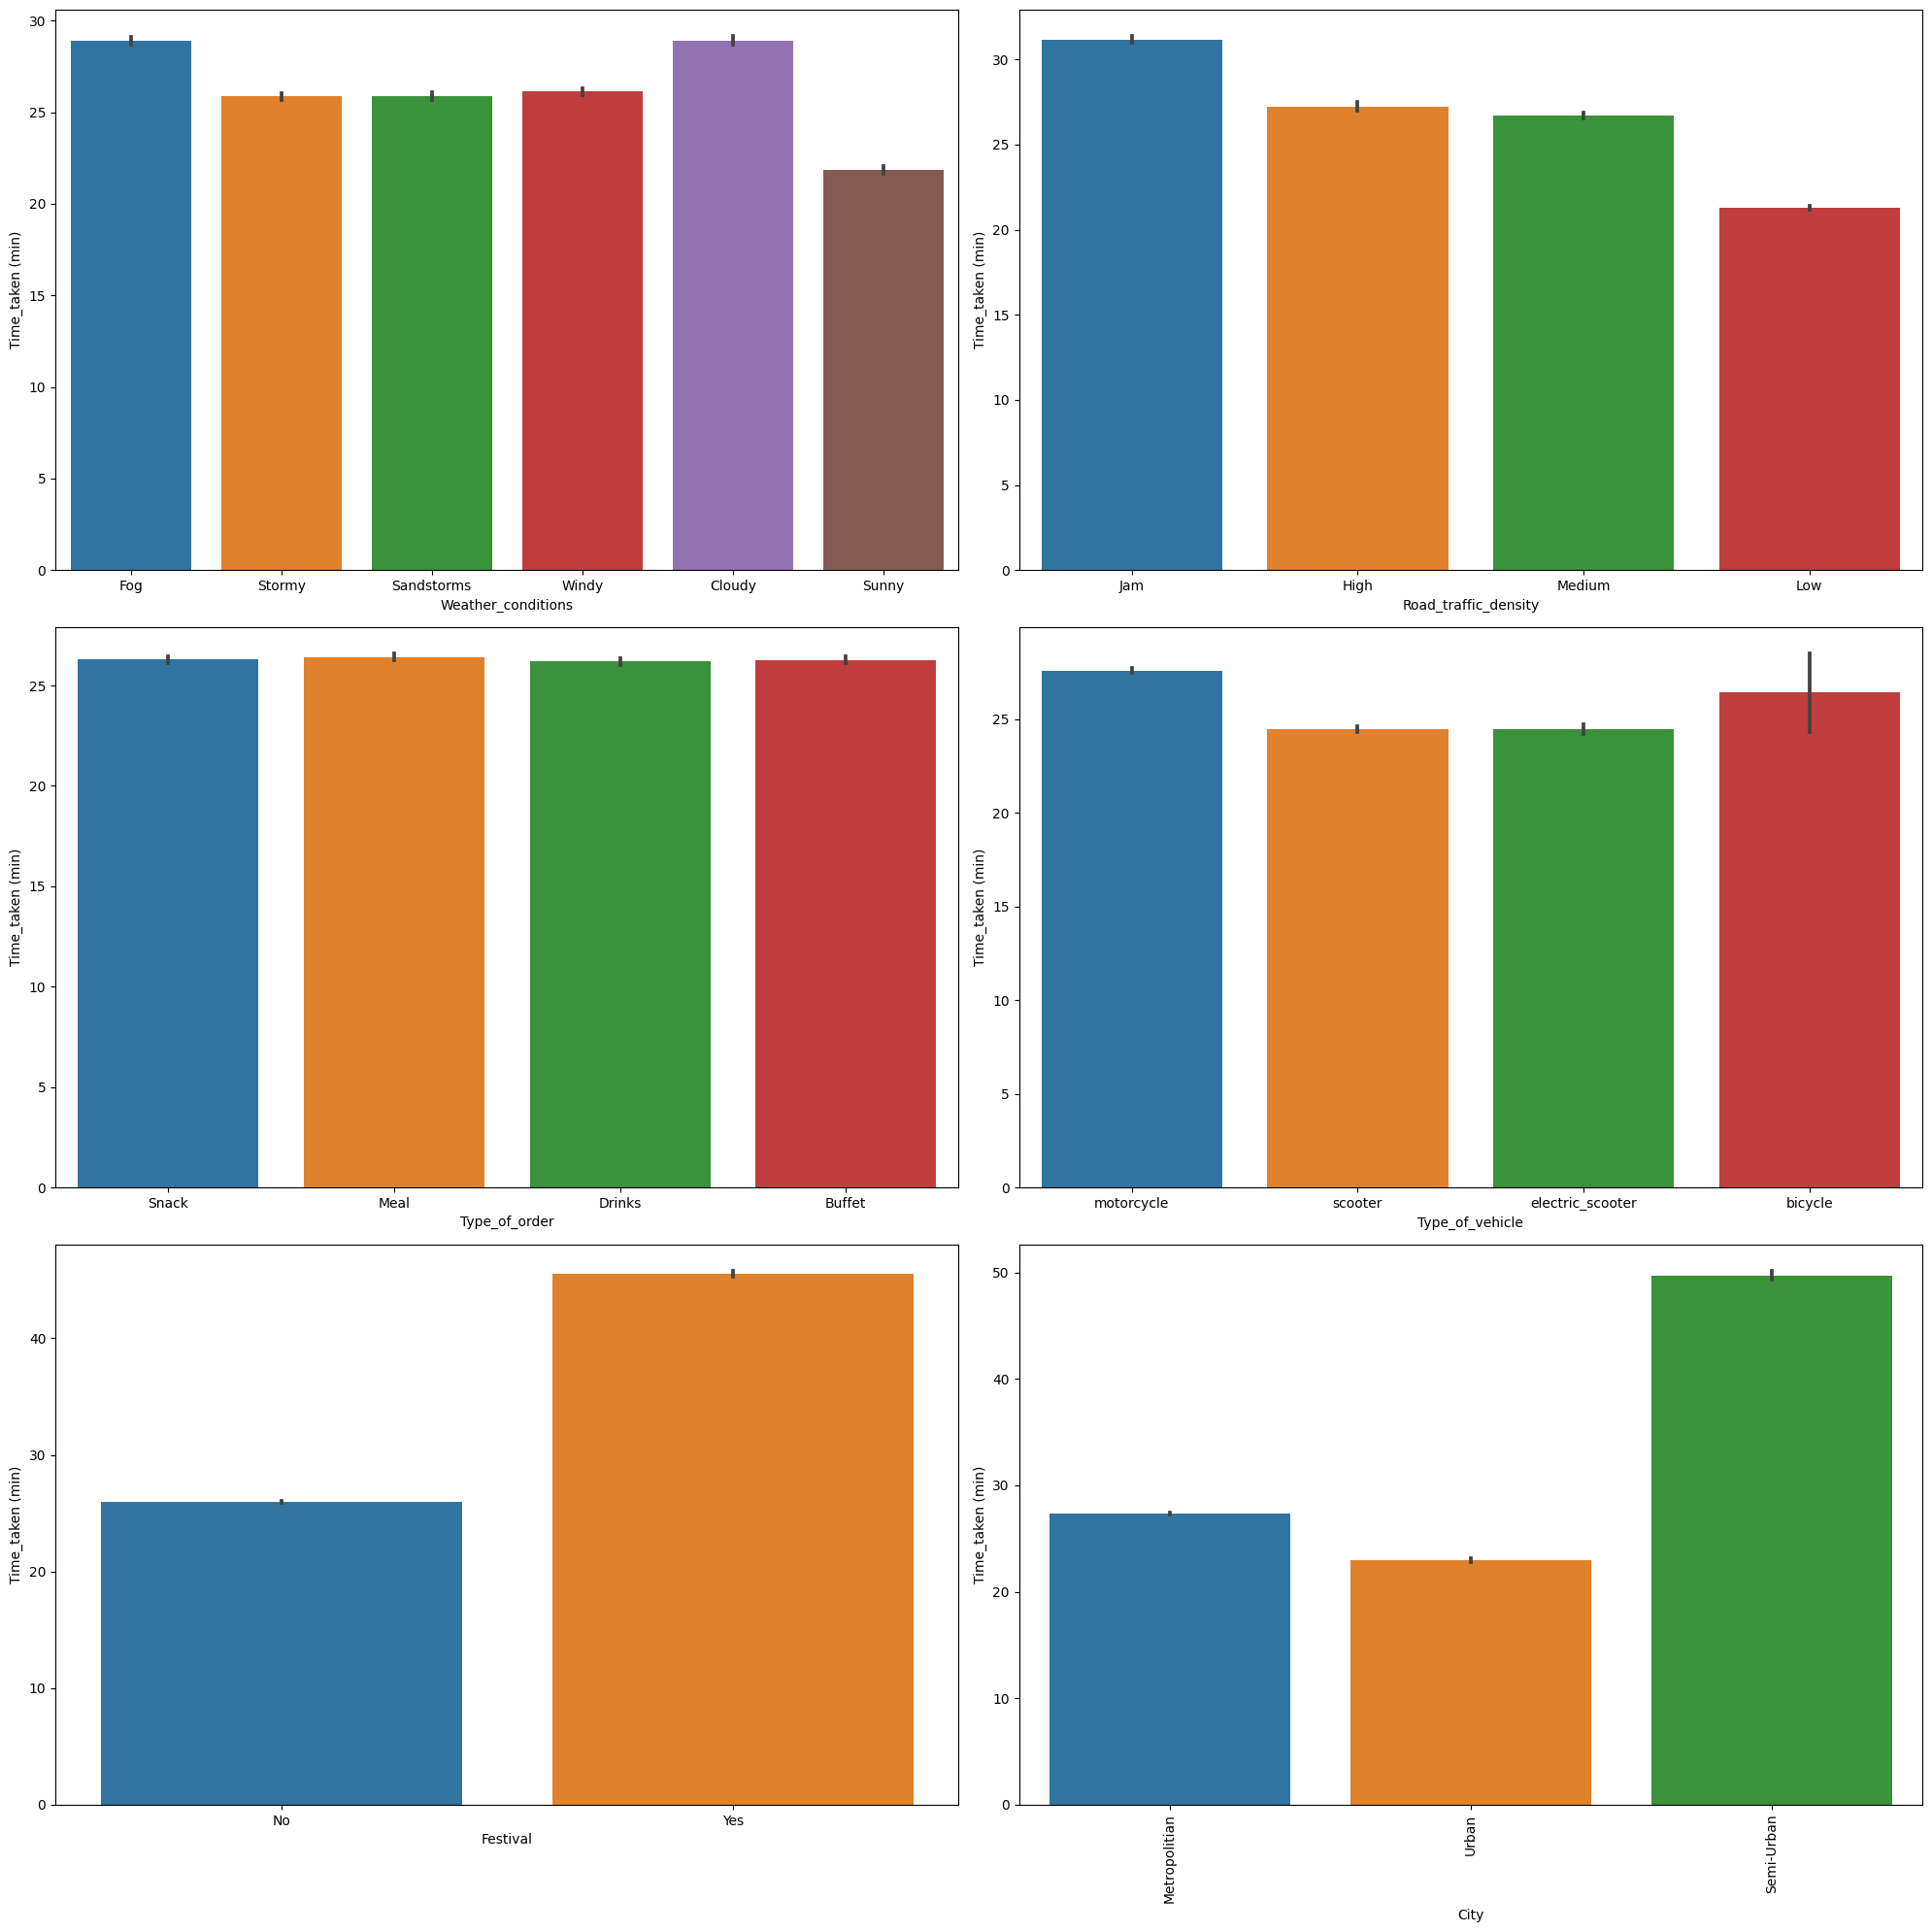

In [313]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
axs=axs.flatten()


for i, var in enumerate(categorical_features):
    sns.barplot(x=var,y='Time_taken (min)',data=df,ax=axs[i],estimator=np.mean)
axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
    
 
fig.tight_layout()
plt.show()

In [314]:
for feature in categorical_features:
    print(feature,'has',len(df[feature].unique()),'unique values : ',list(df[feature].unique()))

Weather_conditions has 7 unique values :  ['Fog', 'Stormy', 'Sandstorms', 'Windy', 'Cloudy', 'Sunny', nan]
Road_traffic_density has 5 unique values :  ['Jam', 'High', 'Medium', 'Low', nan]
Type_of_order has 4 unique values :  ['Snack', 'Meal', 'Drinks', 'Buffet']
Type_of_vehicle has 4 unique values :  ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Festival has 3 unique values :  ['No', 'Yes', nan]
City has 4 unique values :  ['Metropolitian', 'Urban', 'Semi-Urban', nan]


In [315]:
Road_traffic_density_map={'Jam': 4, 'High': 3, 'Medium': 2, 'Low': 1}
Festival_map={'No': 0, 'Yes':1}
City_map={'Metropolitian':2, 'Urban':1, 'Semi-Urban':3}
df1['Road_traffic_density']=df1['Road_traffic_density'].map(Road_traffic_density_map)
df1['Festival']=df1['Festival'].map(Festival_map)
df1['City']=df1['City'].map(City_map)

In [316]:
import pandas as pd
df2 = pd.get_dummies(df1, columns = ['Weather_conditions','Type_of_vehicle'])

In [317]:
df2.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Order_Date', 'Time_Orderd', 'Time_Order_picked',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)',
       'distance', 'Weather_conditions_Cloudy', 'Weather_conditions_Fog',
       'Weather_conditions_Sandstorms', 'Weather_conditions_Stormy',
       'Weather_conditions_Sunny', 'Weather_conditions_Windy',
       'Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter'],
      dtype='object')

In [318]:
df2=df2.drop(['Delivery_person_ID','Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude','Order_Date','Time_Orderd','Time_Order_picked','Type_of_order'],axis=1)

<Axes: >

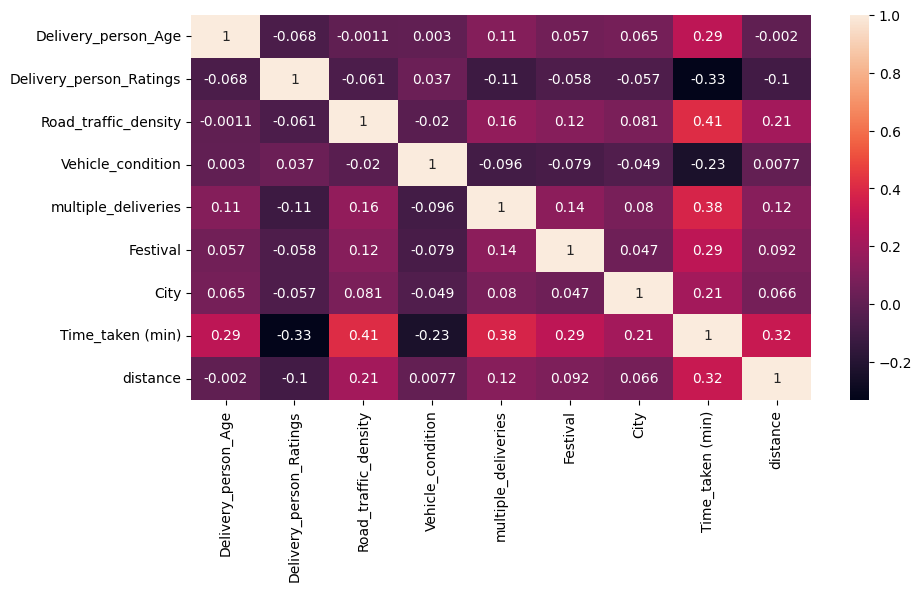

In [319]:
filtered_df = df2.drop(columns=['Weather_conditions_Cloudy', 'Weather_conditions_Fog',
       'Weather_conditions_Sandstorms', 'Weather_conditions_Stormy',
       'Weather_conditions_Sunny', 'Weather_conditions_Windy',
       'Type_of_vehicle_bicycle', 'Type_of_vehicle_electric_scooter',
       'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter'])

plt.figure(figsize=(10,5))
sns.heatmap(filtered_df.corr(),fmt='.2g',annot=True)

In [320]:
from matplotlib.pyplot import figure
figure(figsize=(20, 12))
mask = np.zeros_like(filtered_df.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr('spearman'), annot=True, cmap='flare', linewidths=.5, mask=mask)

ValueError: could not convert string to float: 'DEHRES17DEL01'

<Figure size 2000x1200 with 0 Axes>